In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sn
import matplotlib.pyplot as plt

In [15]:
# Loading data
data = pd.read_csv('hour.csv', sep = ',')

In [16]:
# Separate date
data["date"] = data.dteday.apply(lambda x : x.split()[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.
                                  strptime(dateString,"%Y-%m-%d").weekday())

In [17]:
# Categorical Features and drop features
categoricalFeatureNames = ["season","holiday","workingday","weathersit",
                           "weekday","mnth","yr","hr"]
numericalFeatureNames = ["temp","hum","windspeed","atemp"]
dropFeatures = ['casual',"cnt","dteday","date","registered"]
for var in categoricalFeatureNames:
    data[var] = data[var].astype("category")

In [18]:
# Build Train and test data
data = data[pd.notnull(data['cnt'])].sort_values(by=["dteday"])
y = data["cnt"]

In [19]:
data  = data.drop(dropFeatures,axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data, y, test_size=0.3, random_state=42)

In [21]:
# Create model
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=500)
rfModel.fit(X = X_train,y = np.log1p(y_train))
preds = rfModel.predict(X= X_test)

In [22]:
# Analyze the results
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

RMSLE Value For Random Forest:  0.2868283368401279


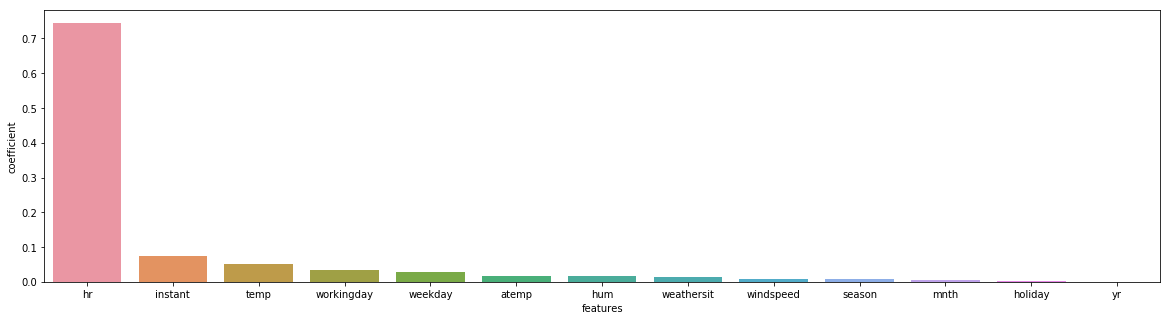

In [24]:
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(np.log1p(y_test)),np.exp(preds),False))
features = pd.DataFrame()
features['features'] = X_train.columns
features['coefficient'] = rfModel.feature_importances_
features.sort_values(by=['coefficient'],ascending=False,inplace=True)
fig,ax= plt.subplots()
fig.set_size_inches(20,5)
sn.barplot(data=features,x="features",y="coefficient",ax=ax);